# Sales Analysis

## Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Task - 1: Merging 12 months of sales data into a single CSV file as we have multiple csv files

In [2]:
import os
all_files = [file for file in os.listdir('./Sales_Data/')]

all_data = pd.DataFrame()

for file in all_files:
    df = pd.read_csv(f'./Sales_Data/{file}')
    all_data = pd.concat([all_data, df])
all_data.to_csv('./Sales_Data/all_data.csv', index=False)

#### Read all_data csv file

In [3]:
all_data = pd.read_csv('./Sales_Data/all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Clean up the data!

#### Drop rows of NaN

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()
all_data = all_data.dropna(how='all')

#### Find 'Or' and delete it

In [5]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
560542,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
560543,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
560544,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
560545,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Convert columns to the correct type

In [6]:
all_data['Quantity Ordered'] =  pd.to_numeric(all_data['Quantity Ordered'])  # make int
all_data['Price Each'] =  pd.to_numeric(all_data['Price Each'])  # make float
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Augmented data with additional columns

### Task 2: Add Month Column

In [7]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')

### Task 3: Add a Sales column

In [8]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
560542,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
560543,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
560544,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
560545,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


### Task 4: Add a City column

In [9]:
# .apply()

all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1] +' '+ x.split(',')[2].split(' ')[1])
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{x.split(',')[1]} ({x.split(',')[2].split(' ')[1]})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Question 1: What was the best month for sales? How much was earned that month?

In [10]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,32709,5.435305e+06,5.466770e+06
2,40347,6.566654e+06,6.606067e+06
3,51015,8.373623e+06,8.421301e+06
4,61674,1.010301e+07,1.017201e+07
5,56001,9.405375e+06,9.457820e+06
6,45759,7.686077e+06,7.733407e+06
7,48216,7.897619e+06,7.943327e+06
8,40344,6.691036e+06,6.733404e+06
9,39327,6.254976e+06,6.292680e+06


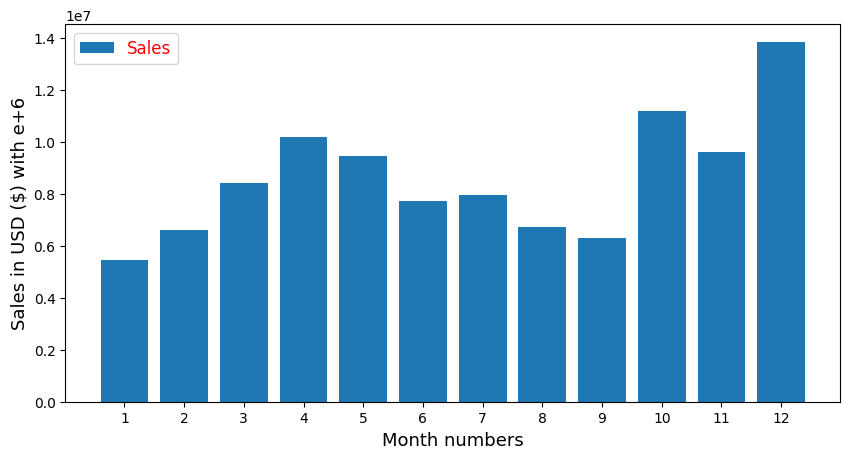

In [11]:
months = range(1, 13)
plt.figure(figsize=(10, 5), dpi=100)
plt.bar(months, results['Sales'], label='Sales')
plt.xticks(months)
plt.xlabel('Month numbers', fontsize=13)
plt.ylabel('Sales in USD ($) with e+6', fontsize=13)
plt.legend(fontsize='large', labelcolor='r')
plt.show()

#### Question 2: What city had the highest number of sales

In [12]:
results = all_data.groupby(['City']).sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),49806,8.339725e+06,314382,8.386496e+06
Austin (TX),33459,5.429621e+06,209487,5.458745e+06
Boston (MA),67584,1.091223e+07,423336,1.098493e+07
Dallas (TX),50190,8.257883e+06,313860,8.303926e+06
Los Angeles (CA),99867,1.626431e+07,624975,1.635771e+07
New York City (NY),83796,1.390611e+07,527223,1.399295e+07
Portland (ME),8250,1.341568e+06,51432,1.349275e+06
Portland (OR),33909,5.581675e+06,211863,5.612197e+06
San Francisco (CA),150717,2.463439e+07,946560,2.478661e+07


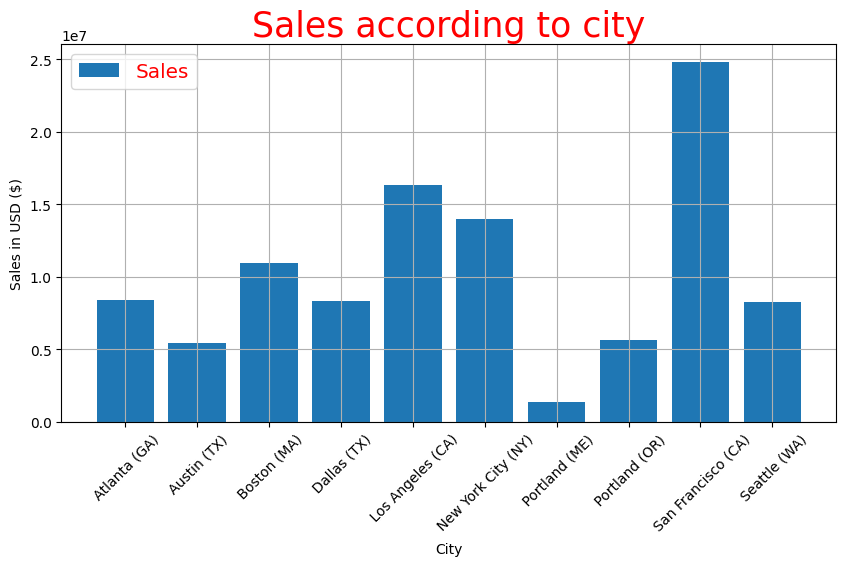

In [13]:
plt.figure(figsize=(10, 5), dpi=100)
cities = [city for city, df in all_data.groupby('City')]

plt.title('Sales according to city', fontsize=25, color='red')
plt.bar(cities, results['Sales'], label='Sales')
plt.legend(loc='upper left', fontsize='x-large', labelcolor='r')
plt.xticks(cities, rotation=45)
plt.xlabel('City')
plt.ylabel('Sales in USD ($)')

plt.grid()
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [14]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [15]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

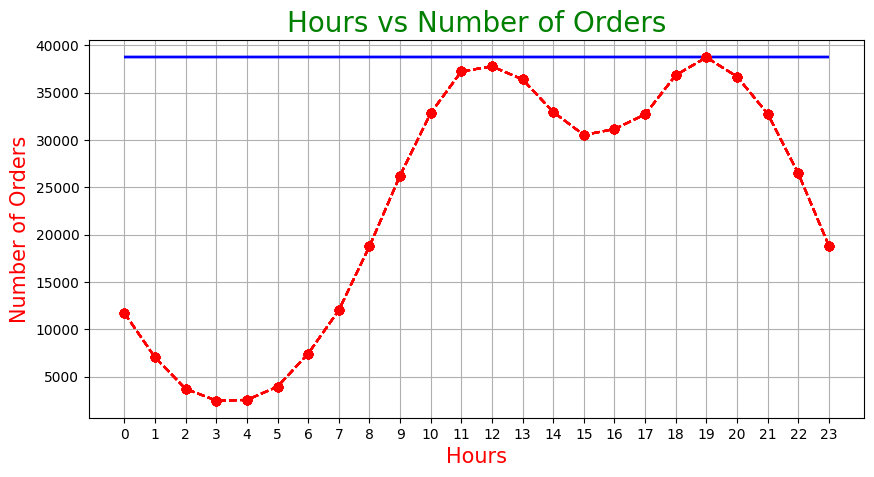

In [16]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(hours, all_data.groupby(['Hour']).count(), 'r--o')
plt.title('Hours vs Number of Orders', fontsize=20, color='green')
plt.xticks(hours)
plt.xlabel('Hours', fontsize=15, color='red')
plt.ylabel('Number of Orders', fontsize=15, color='red')

plt.hlines(all_data.groupby(['Hour']).count().loc[19], 0, 23, color='blue')

plt.grid()
plt.show()

#### Question 4: What products are most often sold together?

In [17]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

,Order ID,Grouped
0,176558,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
1,176559,"Bose SoundSport Headphones,Bose SoundSport Hea..."
2,176560,"Google Phone,Wired Headphones,Google Phone,Wir..."
4,176561,"Wired Headphones,Wired Headphones,Wired Headph..."
5,176562,"USB-C Charging Cable,USB-C Charging Cable,USB-..."


In [18]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))

for key, value in count.most_common(10):
    print(key, value)

('USB-C Charging Cable', 'USB-C Charging Cable', 'USB-C Charging Cable') 22767
('Lightning Charging Cable', 'Lightning Charging Cable', 'Lightning Charging Cable') 22630
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 21505
('AA Batteries (4-pack)', 'AA Batteries (4-pack)', 'AA Batteries (4-pack)') 21207
('Wired Headphones', 'Wired Headphones', 'Wired Headphones') 19512
('Apple Airpods Headphones', 'Apple Airpods Headphones', 'Apple Airpods Headphones') 15981
('Bose SoundSport Headphones', 'Bose SoundSport Headphones', 'Bose SoundSport Headphones') 13811
('27in FHD Monitor', '27in FHD Monitor', '27in FHD Monitor') 7669
('iPhone', 'iPhone', 'iPhone') 6878
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 6320


#### Question 5: What product sold the most? Why do you think it sold the most?

In [19]:
product_grouped = all_data.groupby('Product')
quantity_ordered = product_grouped.sum()['Quantity Ordered']
quantity_ordered

Product
20in Monitor                  12387
27in 4K Gaming Monitor        18732
27in FHD Monitor              22650
34in Ultrawide Monitor        18597
AA Batteries (4-pack)         82905
AAA Batteries (4-pack)        93051
Apple Airpods Headphones      46983
Bose SoundSport Headphones    40371
Flatscreen TV                 14457
Google Phone                  16596
LG Dryer                       1938
LG Washing Machine             1998
Lightning Charging Cable      69651
Macbook Pro Laptop            14184
ThinkPad Laptop               12390
USB-C Charging Cable          71925
Vareebadd Phone                6204
Wired Headphones              61671
iPhone                        20547
Name: Quantity Ordered, dtype: int64

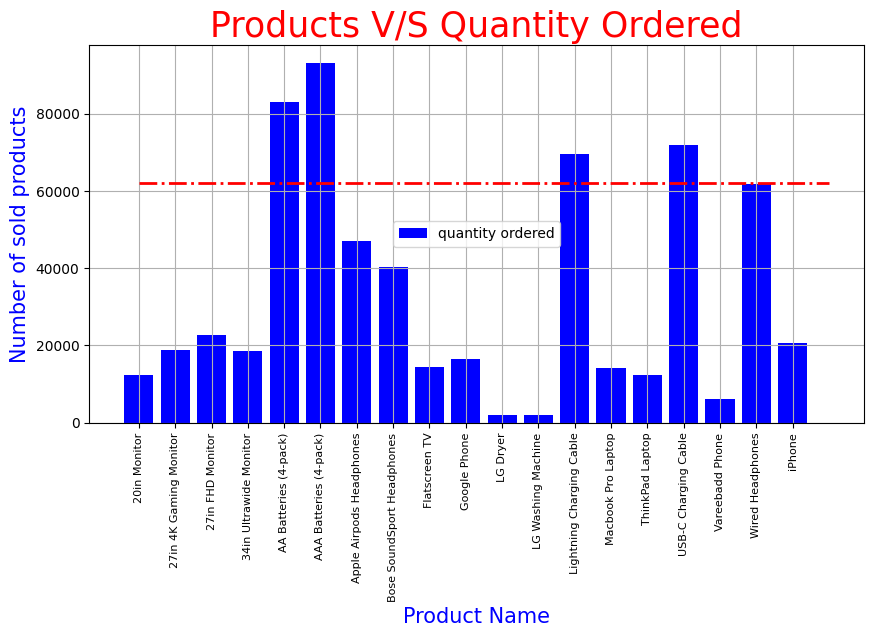

In [20]:
products = [product for product, df in product_grouped]

plt.figure(figsize=(10, 5), dpi=100)
plt.bar(products, quantity_ordered, label='quantity ordered', color='blue')
plt.title('Products V/S Quantity Ordered', fontsize=25, color='red')

plt.xlabel('Product Name', fontsize=15, color='blue')
plt.xticks(products, rotation='vertical', size=8)
plt.hlines(62000, 0, 19, ls='-.', lw=2, color='red')
plt.ylabel('Number of sold products', fontsize=15, color='blue')

plt.legend(loc='center')
plt.grid()
plt.show()

<ipython-input-39-a4ff6332a762>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation=60, size=8)


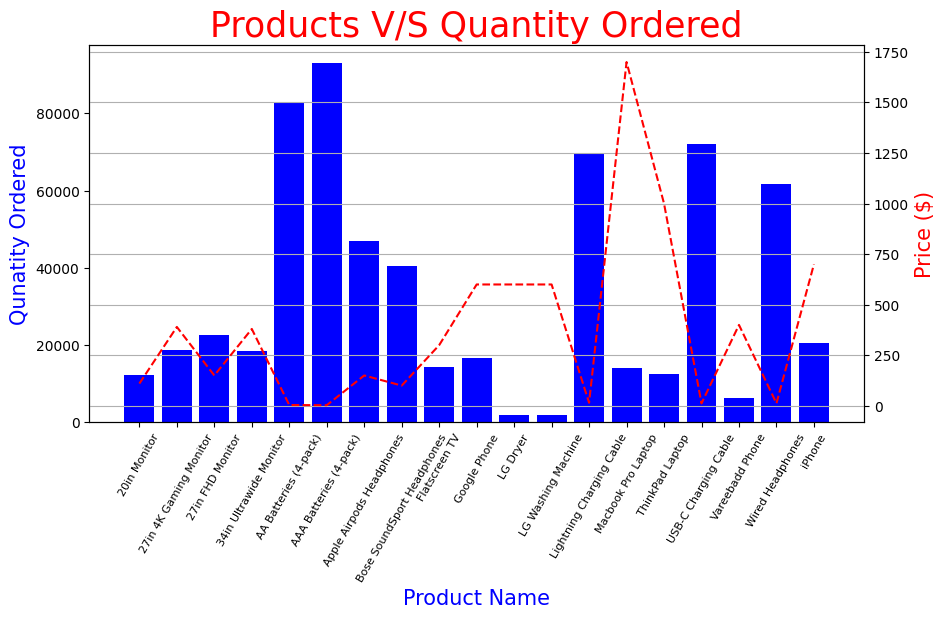

In [39]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots(figsize=(10, 5), dpi=100)

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, label='quantity ordered', color='blue')
plt.title('Products V/S Quantity Ordered', fontsize=25, color='red')

ax2.plot(products, prices, 'r--', label='prices')

ax1.set_xlabel('Product Name', fontsize=15, color='blue')
ax1.set_xticklabels(products, rotation=60, size=8)

ax1.set_ylabel('Qunatity Ordered', fontsize=15, color='blue')
ax2.set_ylabel('Price ($)', color='r', fontsize=15)

plt.grid()
plt.show()